# Librerias

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS 
import pyarrow.parquet as pq
from fastparquet import ParquetFile
import glob
import dask.dataframe as dd
from dask import delayed

In [100]:
#nltk librería de análisis de lenguaje
import nltk
#Este proceso puede hacerse antes de forma manual, descargar las stopwords de la librerñia nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))
#Concatenar las stopwords aplicándose a una cuenta que genera contenido en inglés y español
stop_words = stop_words_sp | stop_words_en
from nltk import tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge.araya.v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Funciones

In [101]:
def wordcloud(texto,col,idgraf):
	#Crear la imagen con las palabras más frecuentes
    wordcloud = WordCloud(background_color="white",stopwords=stop_words,random_state = 2016).generate(" ".join([i for i in texto[col]]))
    #Preparar la figura
    plt.figure(num=idgraf, figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off  plt.title( Datascience+")

@delayed
def load_chunk(path):
    return ParquetFile(path).to_pandas()

# Leer Archivos almacenados

In [102]:
files = glob.glob('output/*.parquet')
df = dd.from_delayed([load_chunk(f) for f in files])

df.compute()


,url,contenido
0,https://cl.linkedin.com/jobs/view/desarrollado...,"[<div class=""show-more-less-html__markup show-..."
1,https://cl.linkedin.com/jobs/view/analista-des...,"[<div class=""show-more-less-html__markup show-..."
2,https://cl.linkedin.com/jobs/view/alumno-en-pr...,"[<div class=""show-more-less-html__markup show-..."
0,https://cl.linkedin.com/jobs/view/machine-lear...,"[<div class=""show-more-less-html__markup show-..."
1,https://cl.linkedin.com/jobs/view/ingeniero-so...,"[<div class=""show-more-less-html__markup show-..."
...,...,...
21,https://cl.linkedin.com/jobs/view/analista-de-...,"[<div class=""show-more-less-html__markup show-..."
22,https://cl.linkedin.com/jobs/view/analista-dat...,"[<div class=""show-more-less-html__markup show-..."
23,https://cl.linkedin.com/jobs/view/data-analyst...,"[<div class=""show-more-less-html__markup show-..."
24,https://cl.linkedin.com/jobs/view/data-science...,"[<div class=""show-more-less-html__markup show-..."


# Preparacion de DATA a Visualizar

In [103]:
comment_words = '' 

for val in df.contenido:
    val = str(val).replace("<p>", "")
    val = str(val).replace('class="show-more-less-html__markup', "")
    val = str(val).replace('[<div', "")
    val = str(val).replace('</div>]', "")
    val = str(val).replace('<br/>', "")
    val = str(val).replace('show-more-less-html__markup--clamp-after-5">', "")
    val = str(val).replace('<br/>', "")
    val = str(val).replace('.', "")
    val = str(val).replace('</p>', "")
    val = str(val).replace('(', "")
    val = str(val).replace(')', "")
    val = str(val).replace('<strong>', "")
    val = str(val).replace('</strong>', "")    
    val = str(val).replace('</li>', "")    
    val = str(val).replace('<li>', "")    
    val = str(val).replace('</ul>', "")    
    val = str(val).replace('<ul>', "")    
    val = str(val).replace('?', " ")   
    val = str(val).replace('¿', " ")    
    val = str(val).replace('</u>', "")    
    val = str(val).replace('<u>', "")    
    
    
	
    tokens = val.split()
    #print(tokens)
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

# Grafica

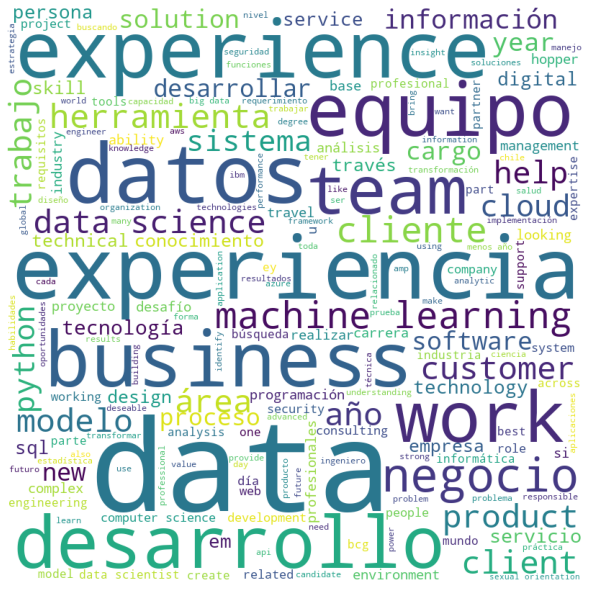

In [104]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 